<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week07/logistic_regression_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

In [29]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR-Qf9MaK2bAIcmBnbhOin4iJpgOde-MN_yu2Ji6HNH3lNvEITYwzqvV8eLrC284q6qKQMybIRNtb8J/pub?output=csv'
df = pd.read_csv(url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
# Explore the data
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())
print()
df.info()

Duplicates: 0
Missing Values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float6

In [31]:
# Set the features and target
X = df.drop(columns = ['diagnosis', 'id'])
y = df['diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [32]:
# Construct a logistic regression model
logreg = LogisticRegression()
scaler = StandardScaler()
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train, y_train)

# Evaluate the model
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.9859154929577465
0.9790209790209791


{0.0001: 0.951048951048951,
 0.001: 0.951048951048951,
 0.01: 0.9790209790209791,
 1: 0.9790209790209791,
 10: 0.972027972027972,
 100: 0.951048951048951,
 1000: 0.9370629370629371}

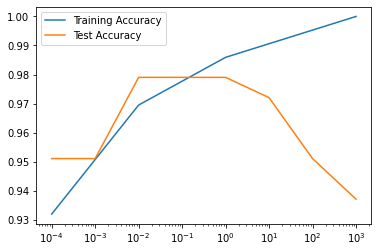

In [39]:
# Tune the logistic model by c.
c_values = [0.0001, 0.001, 0.01, 0.01, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
  log_reg = LogisticRegression(C = c, max_iter = 1000, solver = 'liblinear', penalty = 'l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

# Graph the scores
fig, ax = plt.subplots(1, 1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Test Accuracy')
ax.set_xticks(c_values)
ax.legend()
ax.set_xscale('log')
{c: score for c, score in zip(c_values, test_scores)}

{0.0001: 0.6223776223776224,
 0.001: 0.6223776223776224,
 0.01: 0.951048951048951,
 1: 0.972027972027972,
 10: 0.9440559440559441,
 100: 0.9370629370629371,
 1000: 0.9370629370629371}

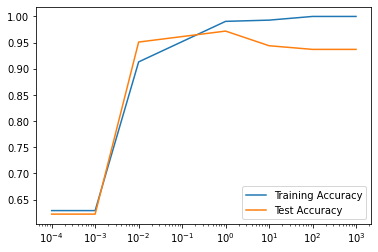

In [ ]:
# Tune the logistic model by c.
c_values = [0.0001, 0.001, 0.01, 0.01, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
  log_reg = LogisticRegression(C = c, max_iter = 1000, solver = 'liblinear', penalty = 'l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

# Graph the scores
fig, ax = plt.subplots(1, 1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Test Accuracy')
ax.set_xticks(c_values)
ax.legend()
ax.set_xscale('log')
{c: score for c, score in zip(c_values, test_scores)}